# Summed up:

 #### ¤ If A chooses 0, B chooses 2/3
 #### ¤ If there are 3 players, optimal choice for A  is 1/4
 #### ¤ If there are 4 players, optimal choices for A  are 1/6 and 5/6

# Preliminary functions

In [294]:
def zone(_l, n):
    """simple function that for a list _l gives the zone taken by last element in position n"""
    l = _l.copy()
    l.sort()
    pos = l.index(_l[n])
    if pos == 0:
        return l[0] + (l[1]-l[0])/2
    elif pos == len(l)-1:
        return (l[-1]-l[-2])/2 + (N - l[-1])
    else:
        return (l[pos+1] -  l[pos-1])/2
        

In [296]:
from statistics import mean

def nested_average(l):
    """Since that at a given stage of the game, the next player might have many equally good position to play
    We have to take the average of the zone we'll have
    thinking that the next player is going to play one of his best positions
    himself thinking that the next player is going to play one of his best positions
    himself thinking that the next player is going to play one of his best positions 
    etc.
    hence the recursive function
    """
    if isinstance(l[0], float):
        return mean(l)
    else:
        return mean([nested_average(sub_list) for sub_list in l])

#  Calculating the results with 4 players

In [285]:
results = {}

for N in range(10, 61): #looping for different discretization scales to go throught discretization effects

    mat_pos_d = [[[[] for c in range(N+1)] for b in range(N+1)] for a in range(N+1)]
    # we first gonna calculate mat_pos_d
    # we have for example in case N=10 : mat_pos_d[0][1][10] = [2, 3, 4, 5, 6, 7, 8, 9] 
    # which is the list of the optimal choices for d given a=0, b=1, c=10

    for a in range(N+1):
        for b in range(N+1):
            for c in range(N+1):
                z_min = -1
                pos_min = []
                for d in range(N+1):
                    if d not in [a, b, c]:
                        z = zone([a,b,c,d], 3)
                        if z > z_min:
                            pos_min = [d]
                            z_min = z                    
                        elif z == z_min:
                            pos_min.append(d)
                mat_pos_d[a][b][c] = pos_min.copy()

    mat_pos_c = [[[] for b in range(N+1)] for a in range(N+1)]
    # now we have mat_pos_d which, we know where D is optimal for each (a,b,c)
    # so we can calculate mat_pos_c for C

    for a in range(N+1):
        for b in range(N+1):
            z_min = -1
            pos_min = []
            for c in range(N+1):
                if c not in [a, b]:
                    z = nested_average([zone([a,b,c,d], 2) for d in mat_pos_d[a][b][c]])
                    if z > z_min:
                        pos_min = [c]
                        z_min = z                    
                    elif z == z_min:
                        pos_min.append(c)
            mat_pos_c[a][b] = pos_min.copy()

    mat_pos_b = [[] for a in range(N+1)] # same for B know that C and D is determined given (a, b)
    
    for a in range(N+1):
        z_min = -1
        pos_min = []
        for b in range(N+1):
            if b not in [a]:
                z = nested_average([[zone([a,b,c,d], 1) for d in mat_pos_d[a][b][c]] for c in mat_pos_c[a][b]])
                if z > z_min:
                    pos_min = [b]
                    z_min = z                    
                elif z == z_min:
                    pos_min.append(b)
        mat_pos_b[a] = pos_min.copy()


    z_min = -1
    mat_pos_a = []
    for a in range(N+1):
        z = nested_average([[[zone([a,b,c,d], 0) for d in mat_pos_d[a][b][c]] for c in mat_pos_c[a][b]] for b in mat_pos_b[a]])
        if z > z_min:
            mat_pos_a = [a]
            z_min = z                    
        elif z == z_min:
            mat_pos_a.append(a)
    
    results[N] = [pos/N for pos in mat_pos_a]

## Let's plot the results

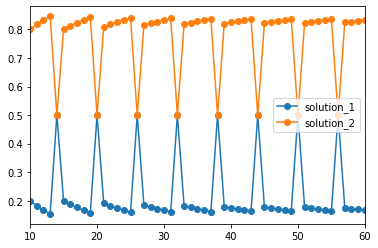

In [287]:
import pandas as pd

df = pd.DataFrame({'solution_1': [v[0] for v in results.values()], 'solution_2':[v[-1] for v in results.values()]}, index=results.keys())
df.plot(linestyle='-', style='o');

### we see that each sequence of 5 consecutive solution points around 0.1666 and 0.8333 flattens the more N is big

# Conclusion

This sequence of solution has 3 adherant points : 1.666··· = 1/6, obviously the symetric value = 5/6, and 1/2

 ¤ <b>1/2 is NOT really a solution :</b><br>
 
We have for example if N=20:<br>
<i>mat_pos_a = [10]<br>
mat_pos_b[10] = [4, 16]<br>
mat_pos_c[10][4] = [16]<br>
mat_pos_d[10][4][16] = [3, 17]<br></i>

Which corresponds to a game where A goes at the 1/2, B and D goes at 1/6 and 5/6<br>
But in facts, this is only discretization effect that makes D goes either at 1/6 - ε or 5/6 + ε<br>
Actually, if {a,b,c} = {1/6, 5/6, 1/2}, the optimal positions for D are {1/6 - ε} U ]1/6 ; 1/2[ U ]1/2 ; 5/6[ U {5/6 + ε}<br>
Since μ({1/6 - ε}) = μ({5/6 + ε}) = 0 because they are discrete values, it's almost certain that D gonna be either in ]1/6 ; 1/2[ or ]1/2 ; 5/6[<br>

 ¤ <b>In conclusion, the optimal game given the rules is :</b><br>
        A goes at 1/6 (or 5/6)<br>
        B goes at 5/6 (or 1/6 if A goes at 5/6)<br>
        C goes at 1/2<br>
        D goes anywhere between A & B<br>

# Lookback at the first question

In [306]:
N = 100

mat_pos_c = [[[] for b in range(N+1)] for a in range(N+1)]
# now we have mat_pos_d which, we know where D is optimal for each (a,b,c)
# so we can calculate mat_pos_c for C

for a in range(N+1):
    for b in range(N+1):
        z_min = -1
        pos_min = []
        for c in range(N+1):
            if c not in [a, b]:
                z = zone([a,b,c], 2)
                if z > z_min:
                    pos_min = [c]
                    z_min = z                    
                elif z == z_min:
                    pos_min.append(c)
        mat_pos_c[a][b] = pos_min.copy()

mat_pos_b = [[] for a in range(N+1)] # same for B know that C and D is determined given (a, b)

for a in range(N+1):
    z_min = -1
    pos_min = []
    for b in range(N+1):
        if b not in [a]:
            z = nested_average([zone([a,b,c], 1)  for c in mat_pos_c[a][b]])
            if z > z_min:
                pos_min = [b]
                z_min = z                    
            elif z == z_min:
                pos_min.append(b)
    mat_pos_b[a] = pos_min.copy()

print("With 3 players, if A=0, then B has to pick {}".format(mat_pos_b[0][0]/N))

With 3 players, if A=0, then B has to pick 0.67


# Lookback at the second question

In [309]:
N = 100

mat_pos_c = [[[] for b in range(N+1)] for a in range(N+1)]
# now we have mat_pos_d which, we know where D is optimal for each (a,b,c)
# so we can calculate mat_pos_c for C

for a in range(N+1):
    for b in range(N+1):
        z_min = -1
        pos_min = []
        for c in range(N+1):
            if c not in [a, b]:
                z = zone([a,b,c], 2)
                if z > z_min:
                    pos_min = [c]
                    z_min = z                    
                elif z == z_min:
                    pos_min.append(c)
        mat_pos_c[a][b] = pos_min.copy()

mat_pos_b = [[] for a in range(N+1)] # same for B know that C and D is determined given (a, b)

for a in range(N+1):
    z_min = -1
    pos_min = []
    for b in range(N+1):
        if b not in [a]:
            z = nested_average([zone([a,b,c], 1)  for c in mat_pos_c[a][b]])
            if z > z_min:
                pos_min = [b]
                z_min = z                    
            elif z == z_min:
                pos_min.append(b)
    mat_pos_b[a] = pos_min.copy()
    

z_min = -1
mat_pos_a = []
for a in range(N+1):
    z = nested_average([[zone([a,b,c], 0) for c in mat_pos_c[a][b]] for b in mat_pos_b[a]])
    if z > z_min:
        mat_pos_a = [a]
        z_min = z                    
    elif z == z_min:
        mat_pos_a.append(a)
    

print("With 3 players, A has to pick {}".format(mat_pos_a[0]/N, mat_pos_a[1]/N))

With 3 players, A has to pick 0.25
